## Data Processing


This script should be run on all images prior to training and prediction to standardize images going through the model.

    MLOPs_BrainCancer_DataProcessing takes in raw MRI images of the Brain (extensions jpg, jpeg and png)  
    and processes them for the machine learning model.  
    This processing includes:  
    1- converting images to gray scale and reducing multi-channel images to a single channel  
    2- scaling pixel intensity to a 0-1 scale  ## NOTE: saved images as 0-255 for easieer visualization. Can scale before training
    3- cropping black space around the image  
    4- scaling image size to 200 x 200 pixels  
    5- standardizing file extensions  
 

In [5]:
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 34.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 37.8 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 8.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 4.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
## libraries:

import os
import numpy as np
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
## functions:

def get_imgs(img_path_array):
    """function that loads images into an array given image paths"""
    imgs = []
    for path in img_path_array:
        img = cv2.imread(path)
        imgs.append(img)
    return imgs


def zero_runs(arr):
    """function that detects consecutive zeros"""
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(arr, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges


def crop_img(img, threshold=0.1):
    """function that crops an array based on a threshold"""
    img_len, img_width = img.shape
    x_min, y_min, x_max, y_max = 0, 0, img_width, img_len
    mask = img > threshold
    bounds_x = zero_runs(mask.sum(axis=0))
    bounds_y = zero_runs(mask.sum(axis=1))
    # if there are zero runs, check if they start at 0 and end at image len
    if bounds_x.size != 0:
        if bounds_x[0][0] == 0:
            x_min = bounds_x[0][1]

        if bounds_x[-1][1] == x_max:
            x_max = bounds_x[-1][0]

    if bounds_y.size != 0:
        if bounds_y[0][0] == 0:
            y_min = bounds_y[0][1]

        if bounds_y[-1][1] == y_max:
            y_max = bounds_y[-1][0]

    return img[y_min:y_max, x_min:x_max]


def process_img(img, img_size = (200, 200)):
    """function that processes the images.
    It converts them to gray scale with 1 channel only.
    It scales them to 0-1, crops negative space around them and resizes them"""
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img_grey_norm = (img_grey / 255)
    img_grey_cropped = crop_img(img_grey)
    img_grey_std = cv2.resize(img_grey_cropped, img_size)
    return img_grey_std



In [8]:
## create folder structure for processed images

## Folder Structure:

folder = """

├── code  
└── dataset  
    └── brain-mri-images-for-brain-tumor-detection  
        └── brain_tumor_dataset
            └── raw
                ├── no  
                └── yes
            
"""

## Edited Folder Structure:

folder_edited = """

├── code  
└── dataset  
    └── brain-mri-images-for-brain-tumor-detection  
        └── brain_tumor_dataset  
            └── raw
                ├── no  
                └── yes
            └── processed
                ├── no  
                └── yes
"""
dataset_dir = "../dataset/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/"

neg_prc_imgs_path = os.path.join(dataset_dir, "processed/no")
pos_prc_imgs_path = os.path.join(dataset_dir, "processed/yes")

## create new folders:
if not os.path.exists(neg_prc_imgs_path):
    os.makedirs(neg_prc_imgs_path)

if not os.path.exists(pos_prc_imgs_path):
    os.makedirs(pos_prc_imgs_path)


In [9]:
## load raw data:
img_extentions = (".png", ".jpg", ".jpeg")

## normal scans
neg_path = dataset_dir + "/raw/no/"
neg_imgs_path = [os.path.join(neg_path, file) for file in os.listdir(neg_path) if file.lower().endswith(img_extentions)]

## brain cancer scans
pos_path = dataset_dir + "/raw/yes/"
pos_imgs_path = [os.path.join(pos_path, file) for file in os.listdir(pos_path) if file.lower().endswith(img_extentions)]


In [10]:
## process images and save them in new path

def imgs_raw_to_process(imgs_path, output_dir, ext=".jpg"):
    for img_path in imgs_path:
        # load img:
        img = cv2.imread(img_path)
        # process image
        new_img = process_img(img)
        # get new file name and path:
        old_filename = os.path.basename(img_path)
        old_filename_no_ext = "".join(list(os.path.splitext(old_filename))[:-1])
        new_filename = "prc_" + old_filename_no_ext + ext
        new_file_path = os.path.join(output_dir, new_filename)
        cv2.imwrite(new_file_path, new_img)


In [11]:
## process images and save them in new path

imgs_raw_to_process(neg_imgs_path, neg_prc_imgs_path)
imgs_raw_to_process(pos_imgs_path, pos_prc_imgs_path)

Now we have images that are standardized in "../dataset/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/processed/" 

## Augment the Data

Since we have very few samples, we can augment the data to generate more data samples.

In [12]:
# Folder Structure:

folder_edited = """

├── code  
└── dataset  
    └── brain-mri-images-for-brain-tumor-detection  
        └── brain_tumor_dataset  
            └── raw
                ├── no  
                └── yes
            └── processed
                ├── no  
                └── yes
                
"""

folder_edited = """

├── code  
└── dataset  
    └── brain-mri-images-for-brain-tumor-detection  
        └── brain_tumor_dataset  
            └── raw
                ├── no  
                └── yes
            └── processed
                ├── no  
                └── yes
            └── augmented
                ├── no  
                └── yes
"""


neg_aug_imgs_path = os.path.join(dataset_dir, "augmented/no")
pos_aug_imgs_path = os.path.join(dataset_dir, "augmented/yes")

## create new folders:
if not os.path.exists(neg_aug_imgs_path):
    os.makedirs(neg_aug_imgs_path)

if not os.path.exists(pos_aug_imgs_path):
    os.makedirs(pos_aug_imgs_path)

In [13]:
## load processed data:
img_extentions = (".jpg")

## normal scans
neg_prc_imgs = [os.path.join(neg_prc_imgs_path, file) for file in os.listdir(neg_prc_imgs_path) if file.lower().endswith(img_extentions)]

## brain cancer scans
pos_prc_imgs = [os.path.join(pos_prc_imgs_path, file) for file in os.listdir(pos_prc_imgs_path) if file.lower().endswith(img_extentions)]



In [14]:
def augment_imgset(imgs_path, gen_samples, output_dir):
    datagen = ImageDataGenerator(
            rotation_range=30,
            horizontal_flip=True,
            vertical_flip=True
        )

    for img_path in imgs_path:
        # load img:
        img = cv2.imread(img_path)
        img = img.reshape((1,) + img.shape)
        # get image name:
        old_filename = os.path.basename(img_path)
        old_filename_no_ext = "".join(list(os.path.splitext(old_filename))[:-1])

        # process images:
        n = 0
        for batch in datagen.flow(img, batch_size=1, save_to_dir=output_dir, save_prefix="aug_" + old_filename_no_ext , save_format="jpg"):
            n += 1
            if n > gen_samples:
                break 

In [15]:
augment_imgset(neg_prc_imgs, 4, neg_aug_imgs_path)
augment_imgset(pos_prc_imgs, 2, pos_aug_imgs_path)

## since there are more positive than negative samples, I set the "gen_samples" less in the positive class to bring the class numbers closer in count

In [16]:
## count number of augmented images

## normal scans
neg_aug_imgs = os.listdir(neg_aug_imgs_path)

## brain cancer scans
pos_aug_imgs = os.listdir(pos_aug_imgs_path)

print("The original dataset contains: \n" + str(len(neg_prc_imgs)) + " normal brain scans \n" + str(len(pos_prc_imgs)) + " brain cancer scans \n" )

print("The Augmented dataset contains: \n" + str(len(neg_aug_imgs)) + " normal brain scans \n" + str(len(pos_aug_imgs)) + " brain cancer scans \n" )

print("The Total dataset contains: \n" + str(len(neg_aug_imgs) + len(neg_prc_imgs)) + " normal brain scans \n" + str(len(pos_aug_imgs) + len(pos_prc_imgs)) + " brain cancer scans \n" )


The original dataset contains: 
98 normal brain scans 
154 brain cancer scans 

The Augmented dataset contains: 
490 normal brain scans 
462 brain cancer scans 

The Total dataset contains: 
588 normal brain scans 
616 brain cancer scans 



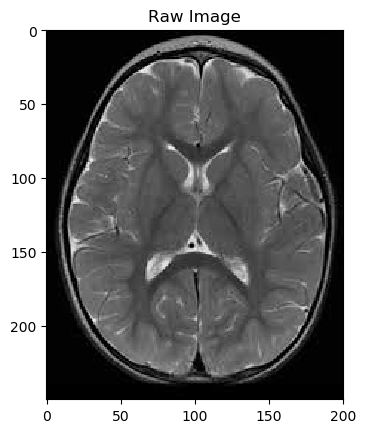

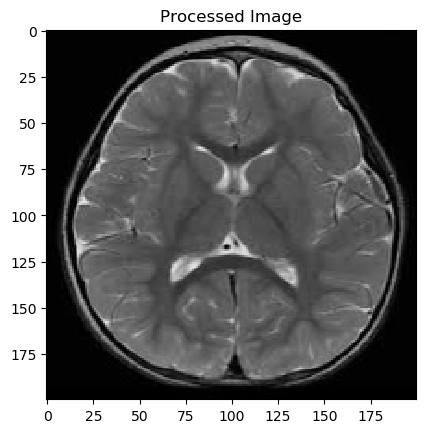

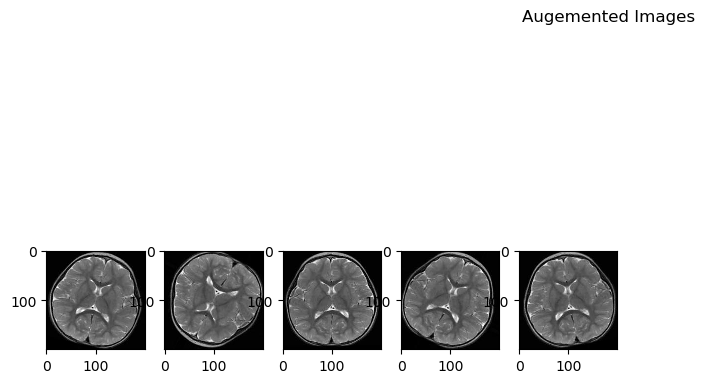

In [17]:
## preview some of the augmented images
import matplotlib.pyplot as plt

img_index = 5
sample_img = neg_imgs_path[img_index]
img = cv2.imread(sample_img)
plt.imshow(img)
plt.title("Raw Image")
plt.show()

basefile = os.path.basename(sample_img)
img_prc = cv2.imread(os.path.join(neg_prc_imgs_path, "prc_" + basefile))
plt.imshow(img_prc)
plt.title("Processed Image")
plt.show()

img_aug = "aug_prc_" + "".join(list(os.path.splitext(basefile))[:-1]) + "_"
img_aug = [file for file in os.listdir(neg_aug_imgs_path) if file.startswith(img_aug)]
plt.figure(figsize=(15,6))
i = 1
for img in img_aug:
    img = cv2.imread(os.path.join(neg_aug_imgs_path, img))
    plt.subplot(1,10,i)
    plt.imshow(img)
    i += 1
    if i > 6:
        break
plt.suptitle("Augemented Images")
plt.show()

Now we have processed images and augemnted images for our training! We have also added around 1000 new images to our dataset